In [1]:
# pre-processing
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/Brandon/Documents/GitHub/bt3103-1d4-statistical-learning/src/data/titanic.csv")

In [2]:
# import plt
import matplotlib.pyplot as plt


In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [64]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

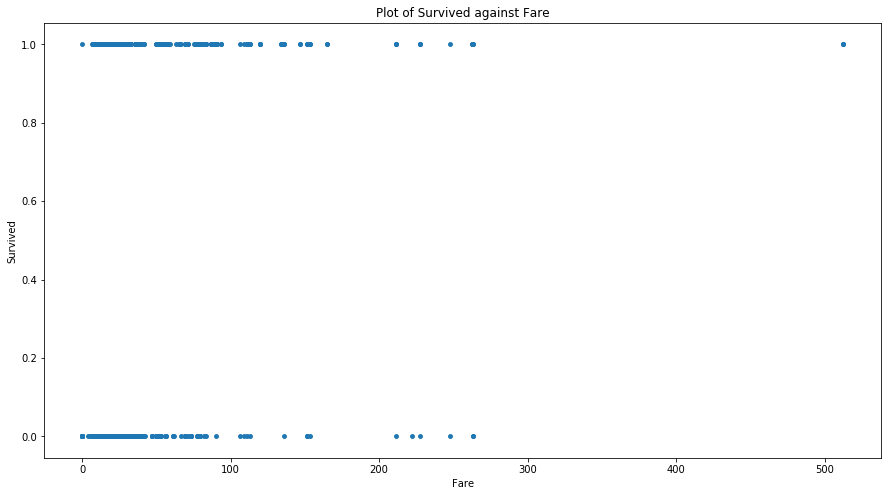

In [19]:
plt.figure(figsize=(15,8))
plt.scatter(df['Fare'], df['Survived'],s = 15)
plt.title('Plot of Survived against Fare')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.show()

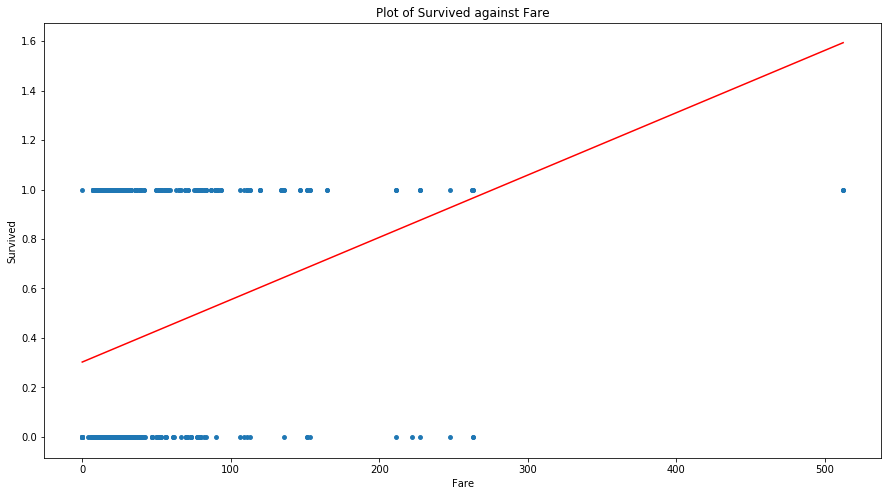

In [18]:
plt.figure(figsize=(15,8))
plt.scatter(df['Fare'], df['Survived'],s = 15)
plt.title('Plot of Survived against Fare')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.plot(np.unique(df['Fare']), np.poly1d(np.polyfit(df['Fare'], df['Survived'], 1))(np.unique(df['Fare'])), color = 'r')
plt.show()

C:\Users\Brandon\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


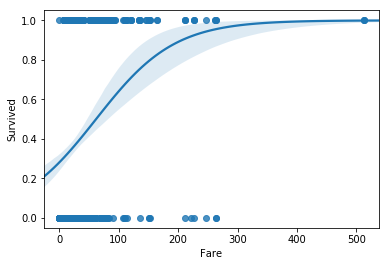

In [20]:
import seaborn as sns
sns.regplot(x='Fare', y='Survived', data=df, logistic=True)

In [78]:
# import the required packages
import statsmodels.formula.api as smf
logit = smf.logit(formula='Survived ~ Pclass', data=df)
result = logit.fit()
# print out 
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608531
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:                 0.08617
Time:                        02:19:44   Log-Likelihood:                -542.20
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.885e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4468      0.207      6.975      0.000       1.040       1.853
Pclass        -0.8501      0.

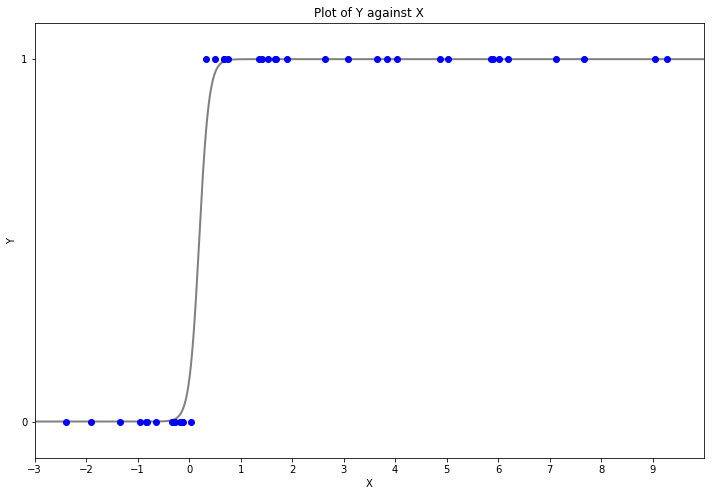

In [63]:
from sklearn import linear_model
from scipy.special import expit

xmin, xmax = -10, 10
n_samples = 40
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += 0.2 * np.random.uniform(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = linear_model.LogisticRegression(C=1e2,solver='lbfgs')
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(12, 8))
plt.clf()
plt.scatter(X.ravel(), y, color='blue', zorder=20)
X_test = np.linspace(-5, 10,600)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='grey', linewidth=2)


plt.title("Plot of Y against X")
plt.ylabel('Y')
plt.xlabel('X')
plt.xticks(range(-3, 10))
plt.yticks([0, 1])
plt.ylim(-.1, 1.1)
plt.xlim(-3, 10)
plt.show()